## Linear Regression 
#### Multivariant Linear Regression, from scratch.

#### AI Saturday Lagos Begineers Class (Instructors: `Tejumade Afonja`, `Kenechi Dukor`, `Stanley Dukor`)
This exercise is adopted from [Andrew Ng Machine Learning Course](https://www.coursera.org/learn/machine-learning)

In [87]:
# Libraries required for this practice 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Loading Data

The data we will be using is a .txt file which contains a list of bedroom sizes, number of bedrooms and their corresponding price of the house.

The values on the first column contains the bedroom sizes, the values of the second column contains the number of bedrooms and values on the third column contains the corresponding price of the house, in Naira.

The goal of this exercise is to use linear regression and the optimization technique to generate a model that will predcit reasonable estimate of a house price when it is supplied the customers desired room size and number of rooms.

In [88]:
# Using pandas to view the data
data = pd.read_csv('data/ex1data2.txt', names=['size','bedroom','price'])
data.head() # this will show the first five data in the dataframe

,size,bedroom,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [89]:
# Lets convert values of the pandas dataframe into a numpy array
data = data.values

You can also convert the data in to a numpy array without needing to go through pandas. Use the code below

`data = np.loadtxt("ex1data1.txt", delimiter=',')`

In [90]:
data.shape

(47, 3)

We have 47 training examples and two independent variable `x` on the first and second column and one dependent variable `y` on the third column

**Recall:**
- Our untrained model is given by: ![title](img/model.gif)
    
- Which you can also be written as ![title](img/model2.gif)

where:
- `y` is the ground truth or output
- `x` is the input values
- `theta` is the weight or parameters that needs to learn


Beacuse we have three coefficient of `theta` `( x1, x2)`, we want to create a `97 x 2` matrix that contains the input values on the first column and second column.

Notice that unlike in the last class, we did not create a third column here that contains `ones` which are coefficients for the **bias** `ie (theta0)`. This is because we would still have to normalize the input data. and it makes no sense normalizing `ones`, because we want them to remain as `ones`.

In [91]:
x_data = np.c_[data[:,0], data[:,1]] 

Similarly, we want to create a row vector with a dimension of `97 x 1` for all the output values in our dataset

In [196]:
y = np.c_[data[:,2]]
y.shape

(47, 1)

### Data Visualization

Text(0.5, 1.0, 'ROOM SIZE VS PRICE')

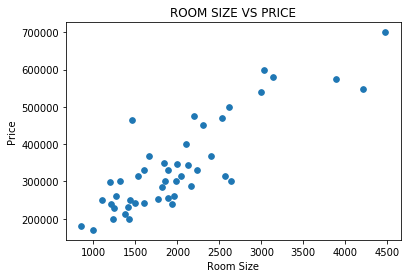

In [93]:
# Lets plot the data to see how they correlate.
plt.scatter(x_data[:,0], y, s=32, marker='o')
plt.xlabel("Room Size")
plt.ylabel("Price")
plt.title("ROOM SIZE VS PRICE")

Text(0.5, 1.0, 'NUMBER OF ROOMS VS PRICE')

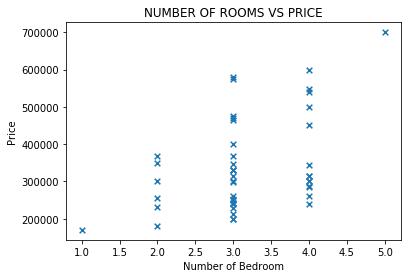

In [94]:
plt.scatter(x_data[:,1], y, s=32, marker='x')
plt.xlabel("Number of Bedroom")
plt.ylabel("Price")
plt.title("NUMBER OF ROOMS VS PRICE")

### Class Discussion

- What do you notice from the two plots?
- Do you thing a reasonable model can be created?

## Feature Normalizing

![title](img/eqn1.gif)

In [259]:
def featureNorm(x_data):
    # save the feature data in another variable
    x_norm = x_data.copy()
    
    # Create a row vector of zeros, having the same number of rows as the input feature
    mean = np.mean(x_data, axis=0)
    standard_deviation = np.std(x_data, axis=0)
    print("... The mean and standard devation for the room sizes are: ", mean[0], " and ", standard_deviation[0] , "\n")
    print("... The mean and standard devation for the number of rooms are: ", mean[1], " and ", standard_deviation[1], "\n")
    
    x_norm = np.divide((x_data - mean),sigma)
    print("... Input feature has been normalized", "\n")
    
    # Now, we can add the one vector that represent the coefficent of the bias that we discussed earlier
    x = np.concatenate((np.ones((x_data[:,0].size, 1)), x_norm), axis=1) 
    print("... A ones vector has been successfully concatenated to the input feature matrix", "\n")
    
    return x, mean, standard_deviation

In [260]:
x, mu, sigma = featureNorm(x_data)

... The mean and standard devation for the room sizes are:  2000.6808510638298  and  786.2026187430467 

... The mean and standard devation for the number of rooms are:  3.1702127659574466  and  0.7528428090618782 

... Input feature has been normalized 

... A ones vector has been successfully concatenated to the input feature matrix 



### Training 

Recall from the class, the process to training a linear regression model is as follow.

We want to find the appropriate value of `theta` that will give us a good estimate of a city's profit if lthe city's population is supplied.

To do this, 
- We want to start with a random value of `theta` to generate a hypothesis
![title](img/model3.gif)

- Then continually correct values of `theta` until the deviation of the hypothesis/prediction `h` from the ground-truth `y` is greatly reduced

**Note:** In the last class, we used something like this `theta = [[0],[0],[0]]` to initialize the values of theta. Going forward, we will use the numpy function to initialize the values of theta, because we could have large number of theta values. ie `theta = np.zeros(3)`

In [255]:
def train(x, y):
    iteration = 500
    # For this practice are initiallizing are theta with values of zero.
    theta = np.zeros((3, 1))
    
    # Here, want to save our cost function or loss or square error, 
    # so that we can have an idea of how the deviation of the hypothesis from the ground thruth reduces
    cost_function = np.zeros(iteration)
    
    for i in range(iteration):
        # Step 1: we make a prediction using the random weights (theta) that we initialized
        # @ is a fancy way do performing dot products
        h = x @ theta
        # Step 2: We take a step to correct the weights (theta) to that the next predicion will be better
        theta = update_weight(h, theta, x)
        # Step 3: We measure the deviation or error
        cost_function[i] = cost(x, theta)

        print("Running Gradient Descent. Current cost function is ", cost_function[i])
        
    return theta, cost_function

But how do we check the error like we defined above?

Remember the error formular (cost function)? 
![title](img/model44.gif)

where:
- `m` is the number of training example
- `x` is the input data
- `h` is the hypothesis
- `y` is the prediction

The equation tries to find the square error between the ground truth and the prediction.


In [256]:
def cost(x, theta):
    m = x[:,0].size
    h = x @ theta
    return (1/2*m) * np.sum(np.square(h - y))

Now that we are able to get a sense of the error, how do we update how weight (theta) such that is predicts better?

Like we discussed in class, gradient descent algorithim will be used for this purpose.

The general formular for gradient is given below:
![title](img/model6.gif)
which can be differentiated to give:
![title](img/model5.gif)
where
- alpha is the learning rate

ie: we continually update the weight(theta) by taking steps(alpha) for the derived gradient of the error until we have sufficiently minimized theta.

In [257]:
def update_weight(h, theta, x):
    m = x[:,0].size
    alpha = 0.01
    theta = theta - alpha * (1/m * (x.T @ (h - y)))
    return theta

Now, lets pass in our data and train.

In [258]:
theta, cost_values = train(x, y)

Running Gradient Descent. Current cost function is  142033787739828.8
Running Gradient Descent. Current cost function is  139235519436896.6
Running Gradient Descent. Current cost function is  136495643570709.28
Running Gradient Descent. Current cost function is  133812907316498.19
Running Gradient Descent. Current cost function is  131186085653634.83
Running Gradient Descent. Current cost function is  128613980722852.16
Running Gradient Descent. Current cost function is  126095421199032.95
Running Gradient Descent. Current cost function is  123629261679167.28
Running Gradient Descent. Current cost function is  121214382085095.69
Running Gradient Descent. Current cost function is  118849687080662.19
Running Gradient Descent. Current cost function is  116534105502912.44
Running Gradient Descent. Current cost function is  114266589806981.6
Running Gradient Descent. Current cost function is  112046115524326.58
Running Gradient Descent. Current cost function is  109871680733965.17
Running G

In [205]:
# Now, lets see our trained weights
print('Our learned value of theta: ',theta.ravel())

Our learned value of theta:  [ 3.38175984e+05  1.03032124e+05 -2.02325233e+02]


Lets visualize how or error reduced durin?g the iteration. This is the power of gradient descent. 

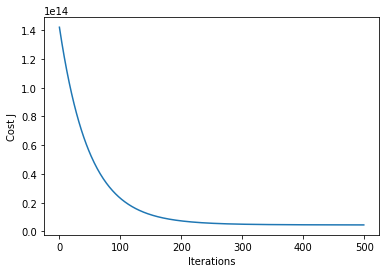

In [25]:
plt.plot(cost_values)
plt.ylabel('Cost J')
plt.xlabel('Iterations');

Notice that at the `400th iteration`, the model doesnt really change anymore. You should actually stop the iteration at that time and save cost of processing

## Predict

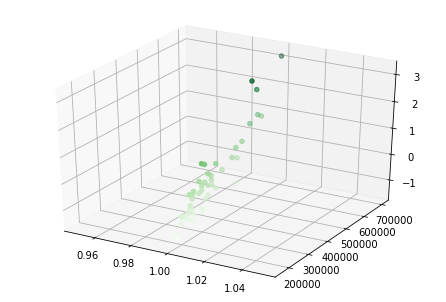

In [273]:
from mpl_toolkits.mplot3d import axes3d, Axes3D #<-- Note the capitalization! 
# x_plot = np.arange(5,23)
# y_plot = theta[1]*x_plot + theta[2]
# # Plot gradient descent
# plt.scatter(x[:,0], y, s=30, c='r', marker='o', linewidths=1)
# plt.plot(x_plot,y_plot, label='Linear regression (Gradient descent)')

#create some test data and simulate results
x_data = x[:,0]
w_real = x[:,1]

# noise = np.random.randn(1,2000)*0.1
# y_data = np.matmul(w_real,x_data.T) + b_real + noise

# print(len(x_data))
# print(len(y_data[0]))

fig = plt.figure()
ax = Axes3D(fig) 
# ax = (fig.add_subplot(111))

x1 = x_data
x2 = w_real
ax.scatter3D(x1, y, x2, c=x2, cmap='Greens', );

## Learning Rates

In [55]:
# Choose some alpha value
alphas = [1,0,0.1,0.001,0.0001]

def update_weight_r(h, theta, x, alpha):
    m = x[:,0].size
    theta = theta - alpha * (1/m * (x.T @ (h - y)))
    return theta

def cost_r(x):
    J = []
    theta = [[0],[0],[0]]
    iteration = 400
    for i in alphas:
        alpha = i
        m = x[:,0].size
        J_alpha = []
        for i in range(iteration):
            h = x @ theta
            theta = update_weight_r(h, theta, x, alpha)
            cost = (1/2*m) * np.sum(np.square(h - y))
            J_alpha.append(cost)
        J.append(J_alpha)
    return J

In [57]:
cost_alpha = cost_r(x)

C:\Users\Kenechi.Dukor\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in double_scalars
C:\Users\Kenechi.Dukor\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in square


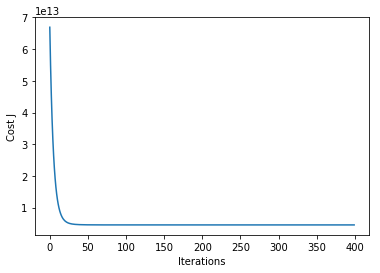

In [72]:

plt.plot(cost_alpha[1])

plt.ylabel('Cost J')
plt.xlabel('Iterations');